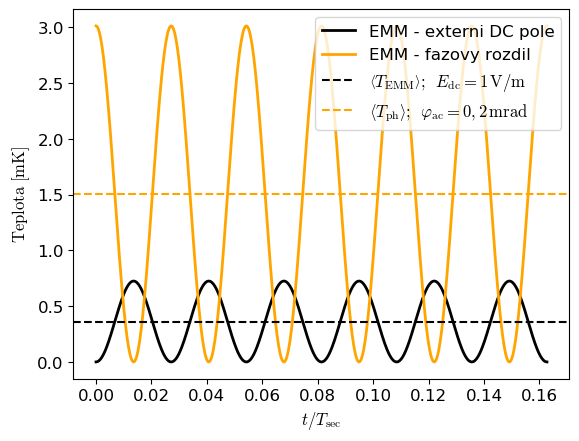

In [56]:
using PyPlot
using PyCall
using LaTeXStrings

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 12
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "false"

using PhysicalConstants.CODATA2018
using Unitful
using Statistics


include("get_mathi_traj.jl")

# parametry pasti
Vrf = 500  # napeti radialnich elektrod [V]
Udc = 1300  # napeti axialnich elektrod [V]
Ω = 2*pi * 30e6 # budici frekvence pasti [Hz]

T = 0.5e-3 # teplota iontu
E_ext = [0,1,0]
delta_phi = [0,2e-4,0] # fazovy rozdil protejsich radialnich elektrod [x, y, 0]
phi = [0,0,0]

# casovy rozsah
tspan = range(0, 2*pi/Ω * 3, length=601)  # drive freq.
#tspan = range(0, 6.145235e-7, length=601)   # sekularni freq.
# analyticke reseni
(u_sec, u_IMM, u_EMM,u_EMM_phase, Per_sec) = get_mathi_traj(Vrf, Udc, Ω, T, E_ext,
    delta_phi, phi, tspan, div=true, sym_type=false)

u = u_sec + u_IMM + u_EMM + u_EMM_phase # celkovy pohyb iontu

(E_kin_sec, T_kin_sec) = get_E_kin_1D(u_sec[:,2])
(E_kin_IMM, T_kin_IMM) = get_E_kin_1D(u_IMM[:,2])
(E_kin_EMM, T_kin_EMM) = get_E_kin_1D(u_EMM[:,2])
(E_kin_EMM_phase, T_kin_EMM_phase) = get_E_kin_1D(u_EMM_phase[:,2])


# use x = linspace(0,2*pi,1000) in Julia 0.6

plot(tspan/Per_sec[2], T_kin_EMM * 1e3, linewidth=2.0, label="EMM - externi DC pole", color="black")
plot(tspan/Per_sec[2], T_kin_EMM_phase * 1e3, linewidth=2.0, label="EMM - fazovy rozdil", color="orange")
axhline(mean(T_kin_EMM)*1e3, linestyle="--", label=L"$ \left< T_{\rm{EMM}} \right>;\,\,\, E_{\rm{dc}} = 1 \, \rm{V/m} $", color="black")
axhline(mean(T_kin_EMM_phase)*1e3, linestyle="--", label=L"$ \left< T_{\rm{ph}} \right>;\,\,\, \varphi_{\rm{ac}} = 0,2 \, \rm{mrad}  $", color="orange")
legend(loc=1)
xlabel(L"$ t/T_{\rm{sec}} $")
ylabel(L" \rm{Teplota \,\,[mK]}")
axis("tight")
savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/ion_temperature_plots/latex_test.pdf", dpi=100)
#legend((line1), ("label1"))